<a href="https://colab.research.google.com/github/greeshmathilakan369/Maternity_risk_prediction/blob/main/sales_forcast_greeshma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem:Forcastnate champagne sales
# The dataset is monthly sales of champagne from year 1964 to 1972.

In [ ]:
# Algorithm :Seasonal ARIMA
# Seasonal Autoregressive Integrated Moving Averages(SARIMA)

# The general process for SARIMA models is the following:

#     Visualize the Time Series Data
#     Make the time series data stationary
#     Plot the Correlation and AutoCorrelation Charts
#     Construct the Seasonal ARIMA based on the data
#     Use the model to make predictions


In [ ]:
# STEP1 : Import the Modules

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df =pd.read_csv("perrin-freres-monthly-champagne.csv")

In [ ]:
# STEP 2:information about Dataset

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
# STEP3:Cleaning up the data

In [ ]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])    #convert to datetime

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month',inplace=True)    #set month as index

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [ ]:
# STEP 4: Visualize the Data

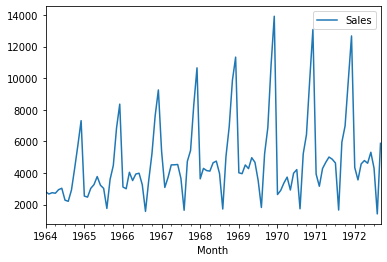

In [ ]:

df.plot() 

In [ ]:
from statsmodels.tsa.stattools import adfuller            #dicky fuller text

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def adf_test(sales):
    result=adfuller(sales)
    print('ADF Statistics: {}'.format(result[0]))   
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df['Sales'])     #p

ADF Statistics: -1.8335930563276188
p- value: 0.363915771660247
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
# STEP 5:Use Techniques Differencing for make stationary


In [ ]:
 
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df.head()         #first val bcme nan

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [ ]:
adf_test(df['Sales First Difference'].dropna())

ADF Statistics: -7.189896448051
p- value: 2.519620447387081e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [ ]:
# Use Techniques Differencing
df['sales Second Difference']=df['Sales First Difference']-df['Sales First Difference'].shift(1)

In [ ]:
adf_test(df['sales Second Difference'].dropna())

ADF Statistics: -7.924774524374138
p- value: 3.643434776644668e-12
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# 12 months 
# Use Techniques Differencing
df['sales 12 Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
adf_test(df['sales 12 Difference'].dropna())       

ADF Statistics: -7.626619157213166
p- value: 2.0605796968136632e-11
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# STEP 6:Plot the Correlation and AutoCorrelation Charts

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf    #autocorelation

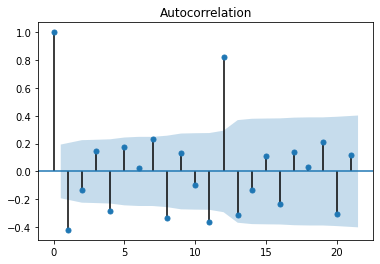

In [ ]:
acf = plot_acf(df["sales Second Difference"].dropna())    #upperbound n lowerbound... have direct impact
#how months coorelated in sales..in sales...using perason coorelation
#band incresing means error also increasing


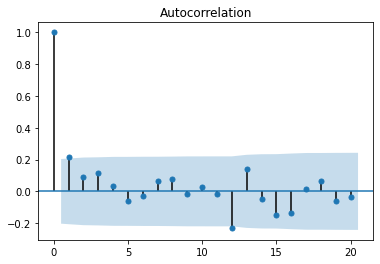

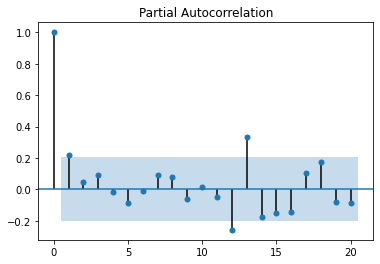

In [ ]:
acf12 = plot_acf(df["sales 12 Difference"].dropna())
pacf12 = plot_pacf(df["sales 12 Difference"].dropna())    


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


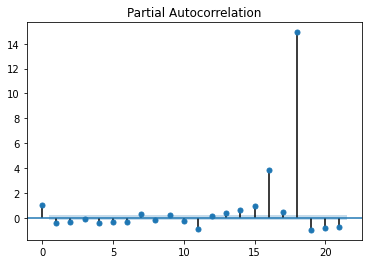

In [ ]:
result = plot_pacf(df["sales Second Difference"].dropna())

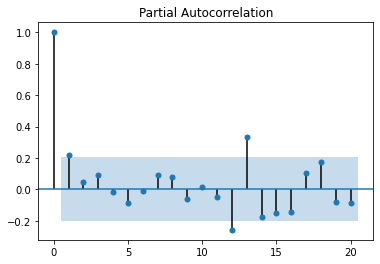

In [ ]:
pacf12 = plot_pacf(df["sales 12 Difference"].dropna())

In [ ]:
### split train and test data
df

,Sales,Sales First Difference,sales Second Difference,sales 12 Difference
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,226.0,NaN
1964-04-01,2721.0,-34.0,-117.0,NaN
1964-05-01,2946.0,225.0,259.0,NaN
...,...,...,...,...
1972-05-01,4618.0,-170.0,-381.0,-392.0
1972-06-01,5312.0,694.0,864.0,438.0
1972-07-01,4298.0,-1014.0,-1708.0,-335.0


In [ ]:
from datetime import datetime,timedelta     #start n end for test data
train_dataset_end=datetime(1968,12,1)
test_dataset_end=datetime(1972,9,1)

In [ ]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data


,Sales,Sales First Difference,sales Second Difference,sales 12 Difference
Month,,,,
1969-01-01,4016.0,-7315.0,-8788.0,383.0
1969-02-01,3957.0,-59.0,7256.0,-335.0
1969-03-01,4510.0,553.0,612.0,356.0
1969-04-01,4276.0,-234.0,-787.0,155.0
1969-05-01,4968.0,692.0,926.0,321.0
1969-06-01,4677.0,-291.0,-983.0,-76.0
1969-07-01,3523.0,-1154.0,-863.0,-442.0
1969-08-01,1821.0,-1702.0,-548.0,98.0
1969-09-01,5222.0,3401.0,5103.0,174.0


In [ ]:
# STEP 8:Construct the Seasonal ARIMA based on the data

In [ ]:
#create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX


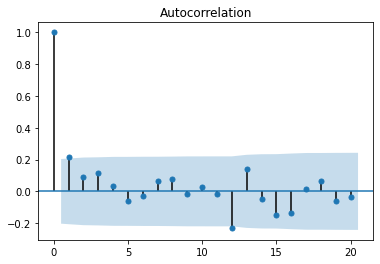

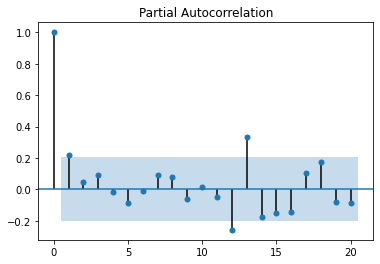

In [ ]:
acf12 = plot_acf(df["sales 12 Difference"].dropna())
pacf12 = plot_pacf(df["sales 12 Difference"].dropna())   #ploat again for values

In [ ]:
model_SARIMA=SARIMAX(train_data['Sales'],order=(3,0,2),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   60
Model:             SARIMAX(3, 0, 2)x(0, 1, 0, 12)   Log Likelihood                -377.160
Date:                            Sun, 03 Jul 2022   AIC                            766.320
Time:                                    10:29:28   BIC                            777.547
Sample:                                01-01-1964   HQIC                           770.563
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0198      0.203     -0.098      0.922      -0.419       0.379
ar.L2          0.8302      0.186      4.472      0.000       0.466       1.194
ar.L3          0.1894      0.210      0.901      0.368      -0.223       0.601
ma.L1         -0.0191      0.310     -0.062      0.951      -0.626       0.588
ma.L2         -0.9746      0.209     -4.671      0.000      -1.384      -0.566
sigma2      4.766e+05   3.97e-07    1.2e+12      0.000    4.77e+05    4.77e+05
===================================================================================
Ljung-Box (Q):                       28.21   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.92   Prob(JB):                         0.03
Heteroskedasticity (H):               2.80   Skew:                             0.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.31e+27. Standard errors may be unstable.
"""

In [ ]:
test_data.tail()

,Sales,Sales First Difference,sales Second Difference,sales 12 Difference
Month,,,,
1972-05-01,4618.0,-170.0,-381.0,-392.0
1972-06-01,5312.0,694.0,864.0,438.0
1972-07-01,4298.0,-1014.0,-1708.0,-335.0
1972-08-01,1413.0,-2885.0,-1871.0,-246.0
1972-09-01,5877.0,4464.0,7349.0,-74.0


In [ ]:
# STEP 9: Prediction

In [ ]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)


1969-01-01 00:00:00
1972-09-01 00:00:00


In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1969,1,1),end=datetime(1980,9,1))
residuals=test_data['Sales']-pred_Sarima

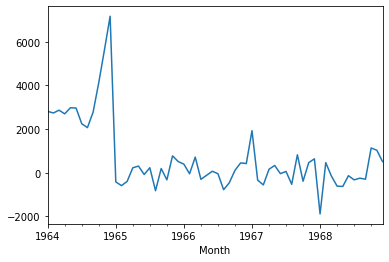

In [ ]:
model_SARIMA_fit.resid.plot()

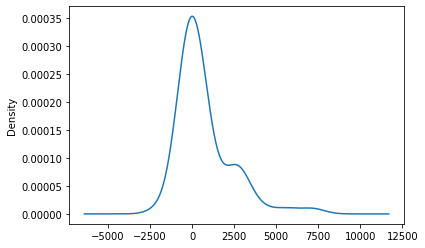

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data

,Sales,Sales First Difference,sales Second Difference,sales 12 Difference,Predicted_SARIMA
Month,,,,,
1969-01-01,4016.0,-7315.0,-8788.0,383.0,4184.742734
1969-02-01,3957.0,-59.0,7256.0,-335.0,4642.042706
1969-03-01,4510.0,553.0,612.0,356.0,4733.901333
1969-04-01,4276.0,-234.0,-787.0,155.0,4504.594852
1969-05-01,4968.0,692.0,926.0,321.0,5187.124925
1969-06-01,4677.0,-291.0,-983.0,-76.0,5170.572605
1969-07-01,3523.0,-1154.0,-863.0,-442.0,4477.781724
1969-08-01,1821.0,-1702.0,-548.0,98.0,2161.791218
1969-09-01,5222.0,3401.0,5103.0,174.0,5544.094616


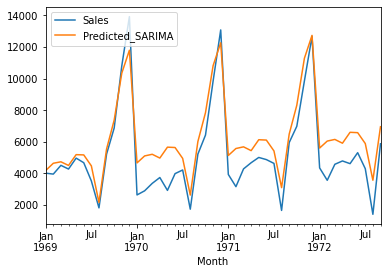

In [ ]:
test_data[['Sales','Predicted_SARIMA']].plot()

In [ ]:
#future

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [ ]:
future_datest_df.tail()


,Sales,Sales First Difference,sales Second Difference,sales 12 Difference
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


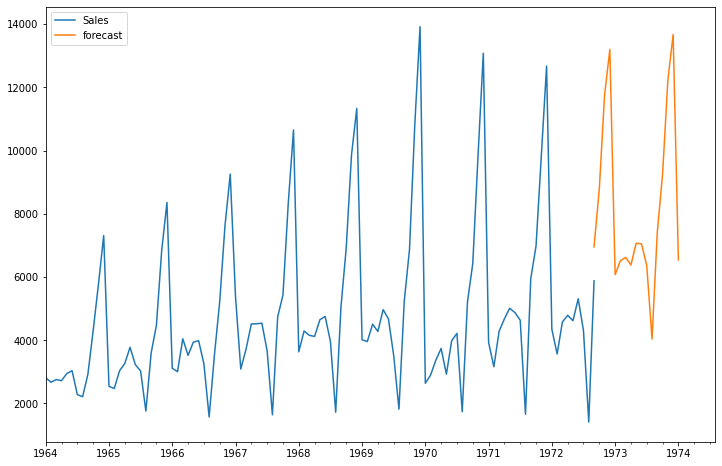

In [ ]:
future_df['forecast'] = model_SARIMA_fit.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 